# Classificazione

L'obiettivo di questo notebook è mostrare come preparare i dati in input e costruire un modello di classificazione/regressione.

Il flusso logico (semplificato) del processo è composto dai seguenti passi:

1. Si analizzano i dati in input e si effettua il pre-processing
2. Si suddivide il dataset in train/validation/test
3. Si costruisce e addestra il modello
4. Si valutano i risultati


In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Primo esempio

Si generano dei dati casuali e si costruisce un modello di regressione lineare

Si "cercano" i parametri che definiscono il modello

    $y = mx + b$
    
![](regression.png)

Nell'esempio della rette è facile individuare i due parametri denominati *slope* e *intercept*

La libreria sklearn mette a disposizione diverse implementazioni di modelli di regressione.
Info: https://scikit-learn.org/stable/modules/linear_model.html


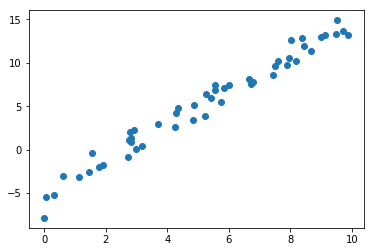

In [2]:
rng = np.random.RandomState(8737) # generatore di numeri casuali

# y = 2 x - 5
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y);

### class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Parameters

**fit_interceptbool**, optional, default True

            Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
        
**normalizebool**, optional, default False

            This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.
        
**copy_X** bool, optional, default True

            If True, X will be copied; else, it may be overwritten.

**n_jobsint** or None, optional (default=None)

            The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

**Osservazioni**

Con il metodo **fit()** si avvia la procedura di stima dei parametri del modello

Con il metodo **predict()** si applica il modello ad un nuovo set di dati e per il quale si vuole ottenere l'ouput, i.e. y = f(x). 

In [3]:
print(f'x = {x.shape}\ty = {y.shape}')

x = (50,)	y = (50,)


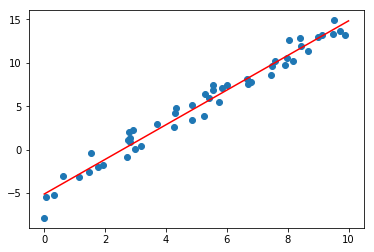

In [4]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression(fit_intercept=True)

# compute parameters, i.e. fit to data
model.fit(x[:, np.newaxis], y)

# use the model to plot the y = mx + b function
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='r');

### fit(self, X, y, sample_weight=None)
Fit the calibrated model

Parameters:

- **Xarray-like**, shape (n_samples, n_features)
  Training data.
- **yarray-like**, shape (n_samples,)
  Target values.
- **sample_weightarray-like** of shape (n_samples,), default=None.  
  Sample weights. If None, then samples are equally weighted.


Il metodo fit accetta come parametri **x** con shape (n_samples, n_features) e **y** con shape (n_samples,). Nell'esempio precedente **y** ha già una shape compatibile, mentre **x** ha una shape (n_samples,). Quindi dobiamo trasformare l'array con l'istruzione:

    x[:, np.newaxis] --> (n_samples, 1)
    
l'attributo **numpy.newaxis** è un alias al valore *None* da utilizzare nelle funzioni che accettano *indici*, permette di creare una nuova dimensione

In [5]:
s1 = x.shape
s2 = x[:, np.newaxis].shape

f'{s1} --> {s2}'

'(50,) --> (50, 1)'

In [6]:
# y = 2 x - 5

print(f'Model slope:      {model.coef_[0]:.2f}')
print(f'Model intercept: {model.intercept_:.2f}')



Model slope:      1.99
Model intercept: -5.11


# Classificazione del dataset MNIST

Il dataset MINIST è costituito da immagini 28x28 pixel contenenti numeri scritti a mano. L'obiettivo è classificare ogni immagine con il numero corrispondente. Quindi serve addestrare un classificatore in grado di riconoscere 10 classi, i numeri da 1 a 10.

Le prossime celle del notebook eseguiranno le seguenti operazioni:

1. Caricamento del dataset
2. Split in train/test
3. Addestramento del modello
4. Valutazione dei risultati

In [7]:
# loading of the mnist dataset at https://www.openml.org/d/554
from sklearn.datasets import fetch_openml

mnist_data = fetch_openml('mnist_784')

In [8]:
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [9]:
x, y = mnist_data['data'], mnist_data['target']

print(f'x = {x.shape}    y = {y.shape}')

# check data types
print(f'x type is {x.dtype}, y type is {y.dtype}')

x = (70000, 784)    y = (70000,)
x type is float64, y type is object


In [10]:
y = y.astype(np.uint8)
print(f'x type is {x.dtype}, y type is {y.dtype}')

x type is float64, y type is uint8


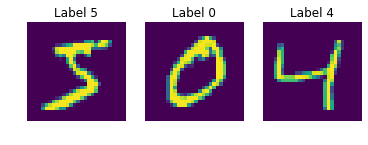

In [11]:

fig, ax = plt.subplots(1, 3)

for i in range(3):
    img = x[i].reshape(28, 28)
    ax[i].imshow(img)
    ax[i].title.set_text(f'Label {y[i]}')
    ax[i].axis('off')

plt.show()

## Split train/test

#### sklearn.model_selection.train_test_split(\*arrays, \*\*options)

Split arrays into random train and test subsets

Parameters:

- **\*arrayssequence** of indexables with same length / shape[0]
  Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

- **test_size** float, int or None, optional (default=None)
    If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

- **train_size** float, int, or None, (default=None)
    If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

- **random_state** int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

- **shuffle** boolean, optional (default=True)
    Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

- **stratifyarray-like** or None (default=None)
    If not None, data is split in a stratified fashion, using this as the class labels.

**Returns**
- splittinglist, length=2 * len(arrays)
    List containing train-test split of inputs.


In [12]:
# SPLIT train/test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=10000,
                                                   shuffle=True,
                                                   random_state=8735,
                                                   stratify=y)

print(f'Train x = {x_train.shape} and y = {y_train.shape}')
print(f'Test  x = {x_test.shape} and y = {y_test.shape}')

Train x = (60000, 784) and y = (60000,)
Test  x = (10000, 784) and y = (10000,)


In [13]:
# check class cardinality
import pandas as pd

cntDataset = np.bincount(y) # shape (10,)
cntTrain = np.bincount(y_train)
cntTest = np.bincount(y_test)

# data must have shape (3, 10)
data = np.concatenate((cntDataset.reshape(1, 10), cntTrain.reshape(1, 10), cntTest.reshape(1, 10)), axis=0)

df = pd.DataFrame(data, columns=range(10), index=['dataset', 'train', 'test'])
df.head(3)

,0,1,2,3,4,5,6,7,8,9
dataset,6903,7877,6990,7141,6824,6313,6876,7293,6825,6958
train,5917,6752,5991,6121,5849,5411,5894,6251,5850,5964
test,986,1125,999,1020,975,902,982,1042,975,994


In [14]:
# as perc
dfPerc = df.div(df.sum(axis=1), axis=0).mul(100).round(1)
dfPerc.head(3)

,0,1,2,3,4,5,6,7,8,9
dataset,9.9,11.3,10.0,10.2,9.7,9.0,9.8,10.4,9.8,9.9
train,9.9,11.3,10.0,10.2,9.7,9.0,9.8,10.4,9.8,9.9
test,9.9,11.2,10.0,10.2,9.8,9.0,9.8,10.4,9.8,9.9


## Train the model

Per l'addestramento del modello è stato scelto un algoritmo di regressione logistica

#### class sklearn.linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

Parameters:

- **loss** str, default=’hinge’
  The loss function to be used. Defaults to ‘hinge’, which gives a linear SVM.
  The possible options are ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, or a regression loss: ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.
  The ‘log’ loss gives logistic regression, a probabilistic classifier. ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. ‘squared_hinge’ is like hinge but is quadratically penalized. ‘perceptron’ is the linear loss used by the perceptron algorithm. The other losses are designed for regression but can be useful in classification as well; see SGDRegressor for a description.


In [15]:
# Train the model
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='log', random_state=2936)
model.fit(x_train, y_train)

print('DONE')

DONE


In [16]:
# evaluate training performance as global accuracy

scoreTraining = model.score(x_train, y_train)
scoreTest = model.score(x_test, y_test)

print(f'Training Accuracy:  {scoreTraining:.4f}')
print(f'Test Accuracy:      {scoreTest:.4f}')

Training Accuracy:  0.8768
Test Accuracy:      0.8572


In [17]:
# retrieve raw prediction

y_pred = model.predict(x_test)

print(f'shape is {y_pred.shape}')
print(f'prediction for first image: {y_pred[0]}')

shape is (10000,)
prediction for first image: 4


In [18]:
# evaluate with confusion matrix
from sklearn.metrics import confusion_matrix

# cm is the matrix M x M with M = classes
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm, columns=range(10)).head(10)

,0,1,2,3,4,5,6,7,8,9
0,858,0,2,19,3,25,24,3,48,4
1,0,1055,4,10,4,2,3,1,44,2
2,0,15,631,101,8,4,45,23,160,12
3,0,0,9,946,0,19,4,4,31,7
4,1,2,2,3,799,2,28,9,57,72
5,6,0,1,73,7,691,29,0,64,31
6,3,1,5,2,1,10,943,0,17,0
7,4,2,6,12,11,3,2,946,13,43
8,2,10,0,46,4,19,11,3,868,12
9,5,1,2,34,11,4,0,39,63,835


In [20]:
# multiclass TP and FP rate
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_test, y_pred)

for idx_class in range(10):
    confusion_matrix = mcm[idx_class, ...]
    
    print(f'\n\nCLASS {idx_class}')
    # true label on row, prediction on column
    print(pd.DataFrame(confusion_matrix, columns=['False', 'True'], index=['False', 'True']).to_markdown())



CLASS 0
|       |   False |   True |
|:------|--------:|-------:|
| False |    8993 |     21 |
| True  |     128 |    858 |


CLASS 1
|       |   False |   True |
|:------|--------:|-------:|
| False |    8844 |     31 |
| True  |      70 |   1055 |


CLASS 2
|       |   False |   True |
|:------|--------:|-------:|
| False |    8970 |     31 |
| True  |     368 |    631 |


CLASS 3
|       |   False |   True |
|:------|--------:|-------:|
| False |    8680 |    300 |
| True  |      74 |    946 |


CLASS 4
|       |   False |   True |
|:------|--------:|-------:|
| False |    8976 |     49 |
| True  |     176 |    799 |


CLASS 5
|       |   False |   True |
|:------|--------:|-------:|
| False |    9010 |     88 |
| True  |     211 |    691 |


CLASS 6
|       |   False |   True |
|:------|--------:|-------:|
| False |    8872 |    146 |
| True  |      39 |    943 |


CLASS 7
|       |   False |   True |
|:------|--------:|-------:|
| False |    8876 |     82 |
| True  |      96 |  

#### sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

Returns:  
**report** string / dict
Text summary of the precision, recall, F1 score for each class. Dictionary returned if output_dict is True. Dictionary has the following structure:

    {'label 1': {'precision':0.5,
                 'recall':1.0,
                 'f1-score':0.67,
                 'support':1},
     'label 2': { ... },
      ...
    }

The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise.

In [22]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       986
           1       0.97      0.94      0.95      1125
           2       0.95      0.63      0.76       999
           3       0.76      0.93      0.83      1020
           4       0.94      0.82      0.88       975
           5       0.89      0.77      0.82       902
           6       0.87      0.96      0.91       982
           7       0.92      0.91      0.91      1042
           8       0.64      0.89      0.74       975
           9       0.82      0.84      0.83       994

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

